<a href="https://colab.research.google.com/github/nvickyn/helloworld/blob/master/R7_InternalLab_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
import keras

### Find dimensions of an image in the dataset

In [4]:
x_train.shape

(60000, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import time

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [10]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

epochs = 10

callback = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Fit the model
start = time.clock() 
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32,callbacks=[callback])
end = time.clock()
print("Train Time: {} ".format(end-start)) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.3717 - acc: 0.8657 - val_loss: 0.3007 - val_acc: 0.8914
Epoch 2/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.2293 - acc: 0.9157 - val_loss: 0.2493 - val_acc: 0.9070
Epoch 3/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.1655 - acc: 0.9382 - val_loss: 0.2325 - val_acc: 0.9192
Epoch 4/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.1141 - acc: 0.9571 - val_loss: 0.2708 - val_acc: 0.9132
Epoch 5/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0783 - acc: 0.9709 - val_loss: 0.3052 - val_acc: 0.9134
Epoch 6/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0522 - acc: 0.9805 - val_loss: 0.3260 - val_acc: 0.9106
Epoch 7/10
60000/6000

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [12]:
# Create the model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
#model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='softmax'))

callback = keras.callbacks.EarlyStopping(patience=5)

epochs = 10


# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
____

In [13]:
# Fit the model
start = time.clock() 
model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32,callbacks=[callback])
end = time.clock()
print("Train Time: {} ".format(end-start)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.3985 - acc: 0.8584 - val_loss: 0.2805 - val_acc: 0.8958
Epoch 2/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.2513 - acc: 0.9084 - val_loss: 0.2471 - val_acc: 0.9092
Epoch 3/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.2030 - acc: 0.9241 - val_loss: 0.2326 - val_acc: 0.9149
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1665 - acc: 0.9384 - val_loss: 0.2239 - val_acc: 0.9206
Epoch 5/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.1386 - acc: 0.9489 - val_loss: 0.2514 - val_acc: 0.9188
Epoch 6/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.1160 - acc: 0.9575 - val_loss: 0.2334 - val_acc: 0.9257
Epoch 7/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0947 - acc: 0.9647 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

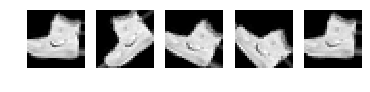

In [17]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [18]:
# Deine Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Conv2D(32, 3, 3))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# More Dropout
#model2.add(Dropout(0.5))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

#Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit_Generator
model2.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validat

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7867 - acc: 0.7082 - val_loss: 0.5997 - val_acc: 0.7798
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5751 - acc: 0.7820 - val_loss: 0.5363 - val_acc: 0.8026
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5145 - acc: 0.8059 - val_loss: 0.4518 - val_acc: 0.8337
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4783 - acc: 0.8199 - val_loss: 0.4444 - val_acc: 0.8372
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4469 - acc: 0.8327 - val_loss: 0.4430 - val_acc: 0.8378
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4270 - acc: 0.8421 - val_loss: 0.3908 - val_acc: 0.8575
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4124 - acc: 0.8472 - val_loss: 0.3749 - val_acc: 0.8632
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [19]:
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 56us/step


[0.3699565833926201, 0.868]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [0]:
%matplotlib inline
# Load/Prep the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


In [26]:
x_train = x_train.reshape(x_train.shape[0], 32,32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

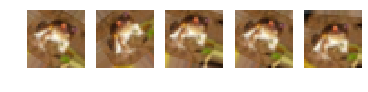

In [28]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()